# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
import math

file_path = "data/data.csv"
column_names = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'Shucked_weight', 'viscera_weight', 'shell_weight', 'rings']
data = pd.read_csv(file_path, header=None, names=column_names)

In [9]:
# First part - calculating sex distribution
counter = data['sex'].value_counts()
sex_distribution = pd.DataFrame({
    '': counter.index,
    'count': counter.values,
    '%': (counter.values / len(data) * 100).round(2)
})

sex_distribution[''] = sex_distribution[''].map({'M': 'Male', 'F': 'Female', 'I': 'Infant'})

# Show distribution
#print(sex_distribution)
display(sex_distribution)

,,count,%
0,Male,1528,36.58
1,Infant,1342,32.13
2,Female,1307,31.29


In [10]:
# Second part - calculating statistics for the quantitative variables in the dataset
columns_to_count = ['length', 'diameter', 'height', 'whole_weight', 'Shucked_weight', 'viscera_weight', 'shell_weight', 'rings']
distributions = []


for i in columns_to_count:
        #counter = data[i]
        values = data[i].describe().round(2)
        #print(values)
        
        distribution = pd.DataFrame({
            '': [i],
            'mean': [values['mean']],
            'std': [values['std']],
            #'std2': [counter.std(ddof=1)],
            'min': [values['min']],
            '25%': [values['25%']],
            '50%': [values['50%']],
            '75%': [values['75%']],
            'max': [values['max']],
        })
        
        distributions.append(distribution) 
        distribution[''] = distribution[''].map({'length' : 'Lenght', 'diameter' : 'Diameter', 'height' : 'Height', 'whole_weight' : 'Whole weight', 'Shucked_weight' : 'Shucked weight', 'viscera_weight' : 'Viscera weight', 'shell_weight' : 'Shell weight', 'rings' : 'Rings'})
distributions = pd.concat(distributions, ignore_index=True)
#print(distributions)
display(distributions)

,,mean,std,min,25%,50%,75%,max
0,Lenght,0.52,0.12,0.08,0.45,0.55,0.62,0.82
1,Diameter,0.41,0.10,0.06,0.35,0.42,0.48,0.65
2,Height,0.14,0.04,0.00,0.12,0.14,0.16,1.13
3,Whole weight,0.83,0.49,0.00,0.44,0.80,1.15,2.83
4,Shucked weight,0.36,0.22,0.00,0.19,0.34,0.50,1.49
5,Viscera weight,0.18,0.11,0.00,0.09,0.17,0.25,0.76
6,Shell weight,0.24,0.14,0.00,0.13,0.23,0.33,1.00
7,Rings,9.93,3.22,1.00,8.00,9.00,11.00,29.00


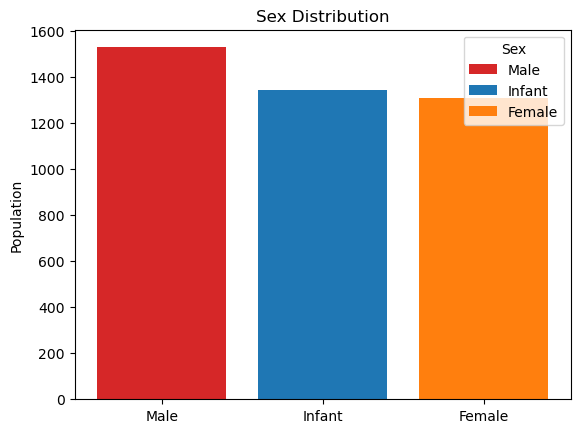

In [11]:
# Third part - Bar plots
fig, ax = plt.subplots()
counter = data['sex'].value_counts()
sex = counter.index.values
#print(sex)
index = []
for i in sex:
    sex = [{'M': 'Male', 'F': 'Female', 'I': 'Infant'}.get(i, i)]
    index.append(sex[0])
#print(sex)
#print(index)

bar_labels = index
bar_colors = ['tab:red', 'tab:blue', 'tab:orange']
ax.bar(index, counter.values, label=bar_labels, color=bar_colors)
ax.set_ylabel('Population')
ax.set_title('Sex Distribution')
ax.legend(title='Sex')

plt.show()

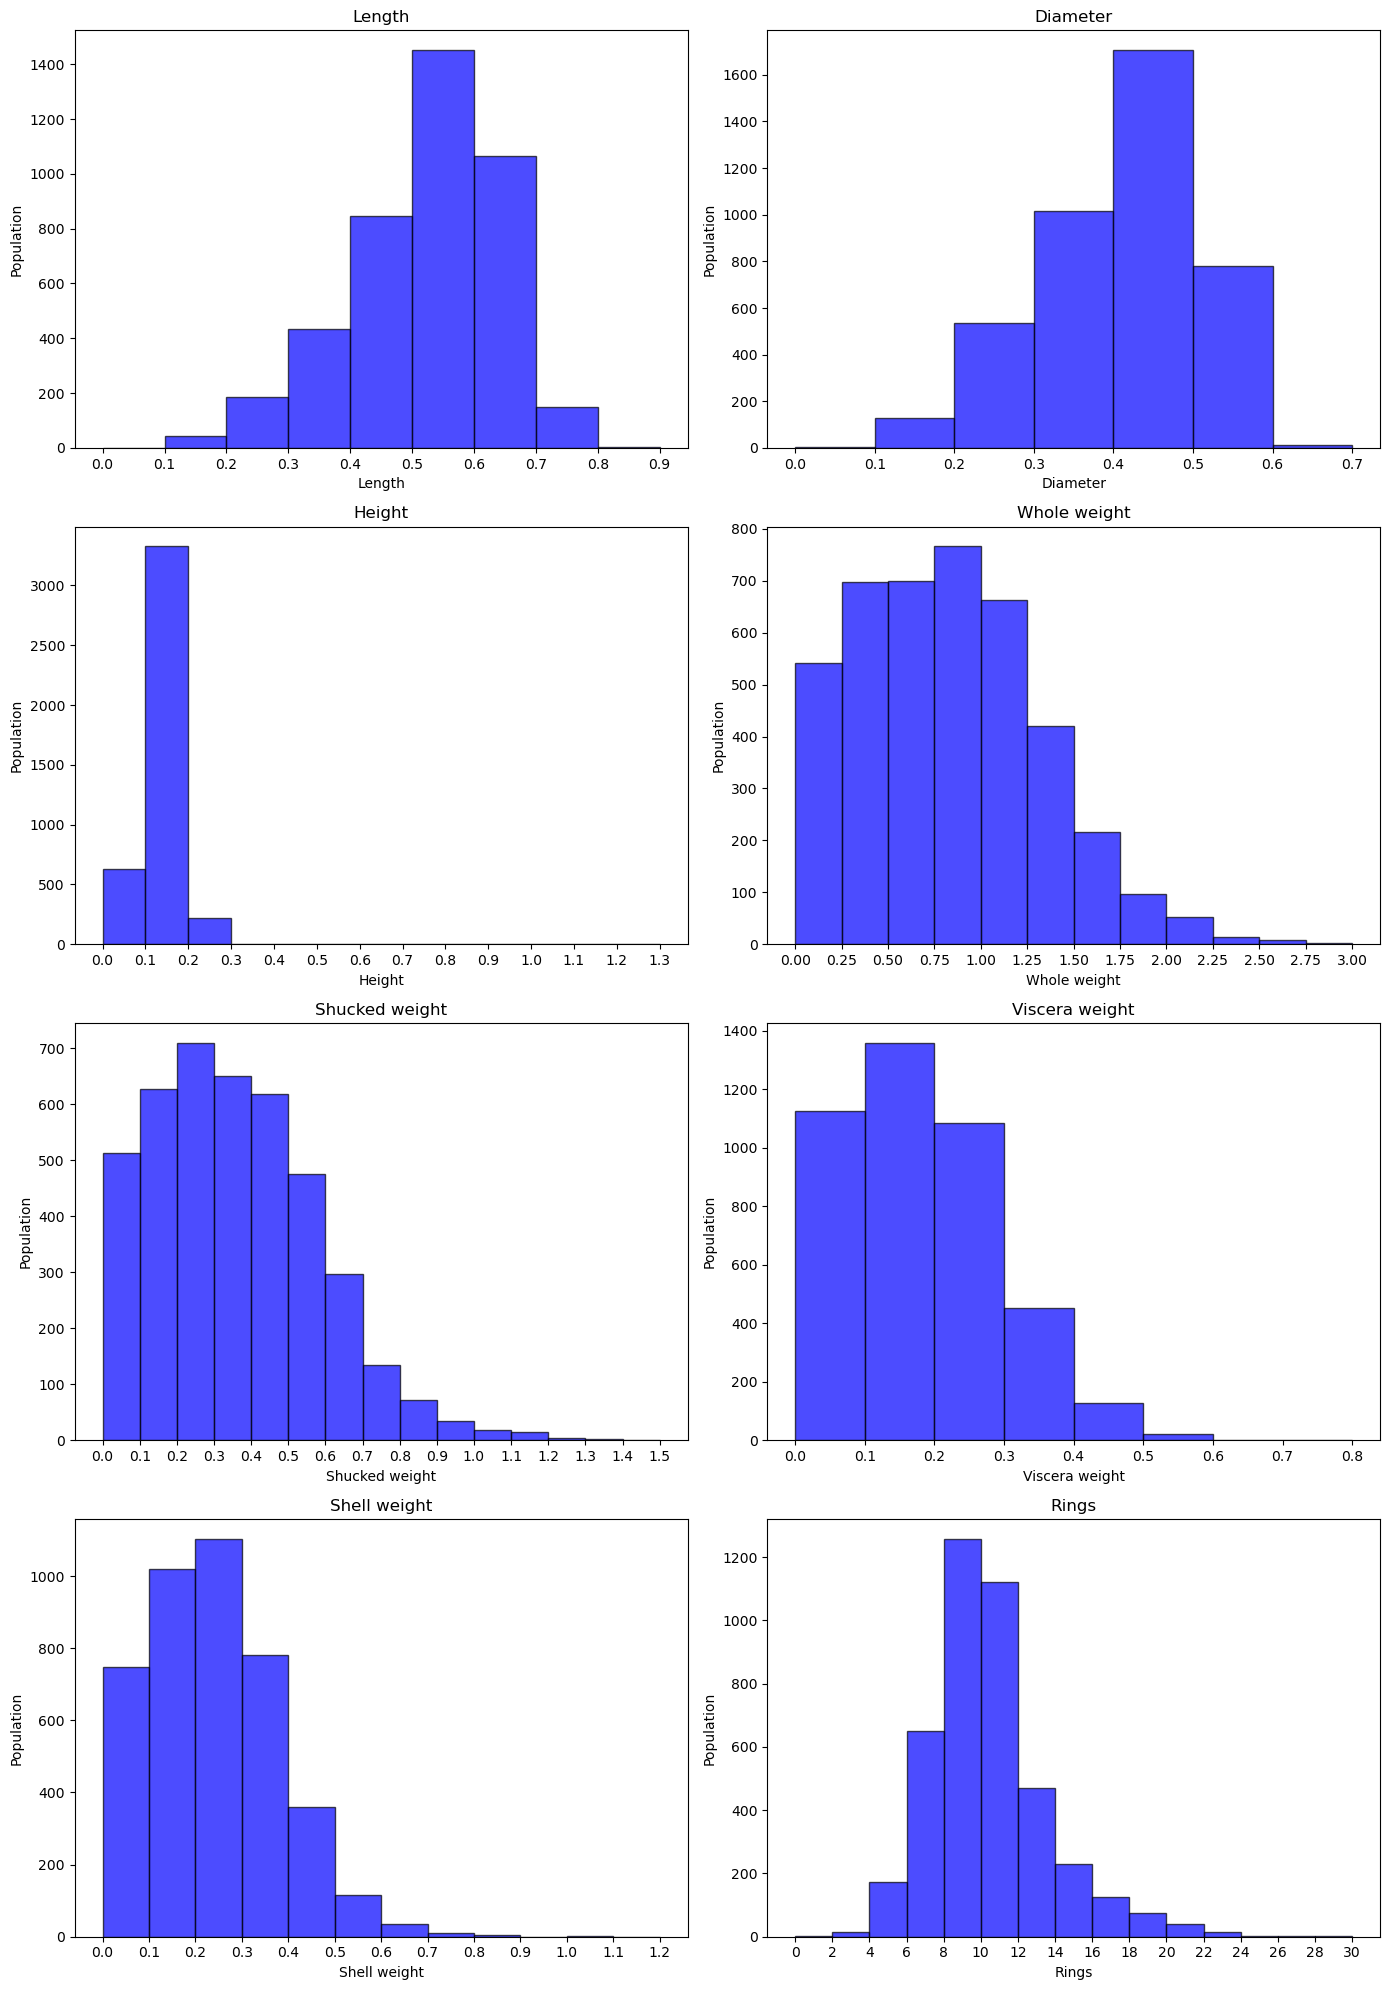

In [12]:
# Fourth part - Histograms
fig, axs = plt.subplots(4, 2, tight_layout=True, figsize=(14, 20))

columns_to_count = ['length', 'diameter', 'height', 'whole_weight', 'Shucked_weight', 'viscera_weight', 'shell_weight', 'rings']
titles = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
labels = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
bins_width = {'length' : 0.1, 
        'diameter' : 0.1, 
        'height' : 0.1, 
        'whole_weight' : 0.25, 
        'Shucked_weight' : 0.1, 
        'viscera_weight' : 0.1, 
        'shell_weight' : 0.1, 
        'rings' : 2}
    
bin_index = 0
for i, ax in enumerate(axs.flat):
    counter_quantity = data[columns_to_count[bin_index]].values
    bin_width = bins_width[columns_to_count[bin_index]]
    first_bin = math.floor(min(counter_quantity) / bin_width) * bin_width
    last_bin = math.ceil(max(counter_quantity) / bin_width) * bin_width
    bins = np.arange(first_bin, last_bin + bin_width, bin_width)
    
    ax.hist(counter_quantity, bins=bins, color='blue', edgecolor='black', alpha=0.7)
    ax.set_title(f'{titles[i]}')
    ax.set_xlabel(f'{labels[i]}')
    ax.set_ylabel('Population')
    ax.set_xticks(np.arange(first_bin, last_bin + bin_width, bin_width))
    
    #fun(ax, bin_width, data)
    bin_index += 1
    
plt.show()


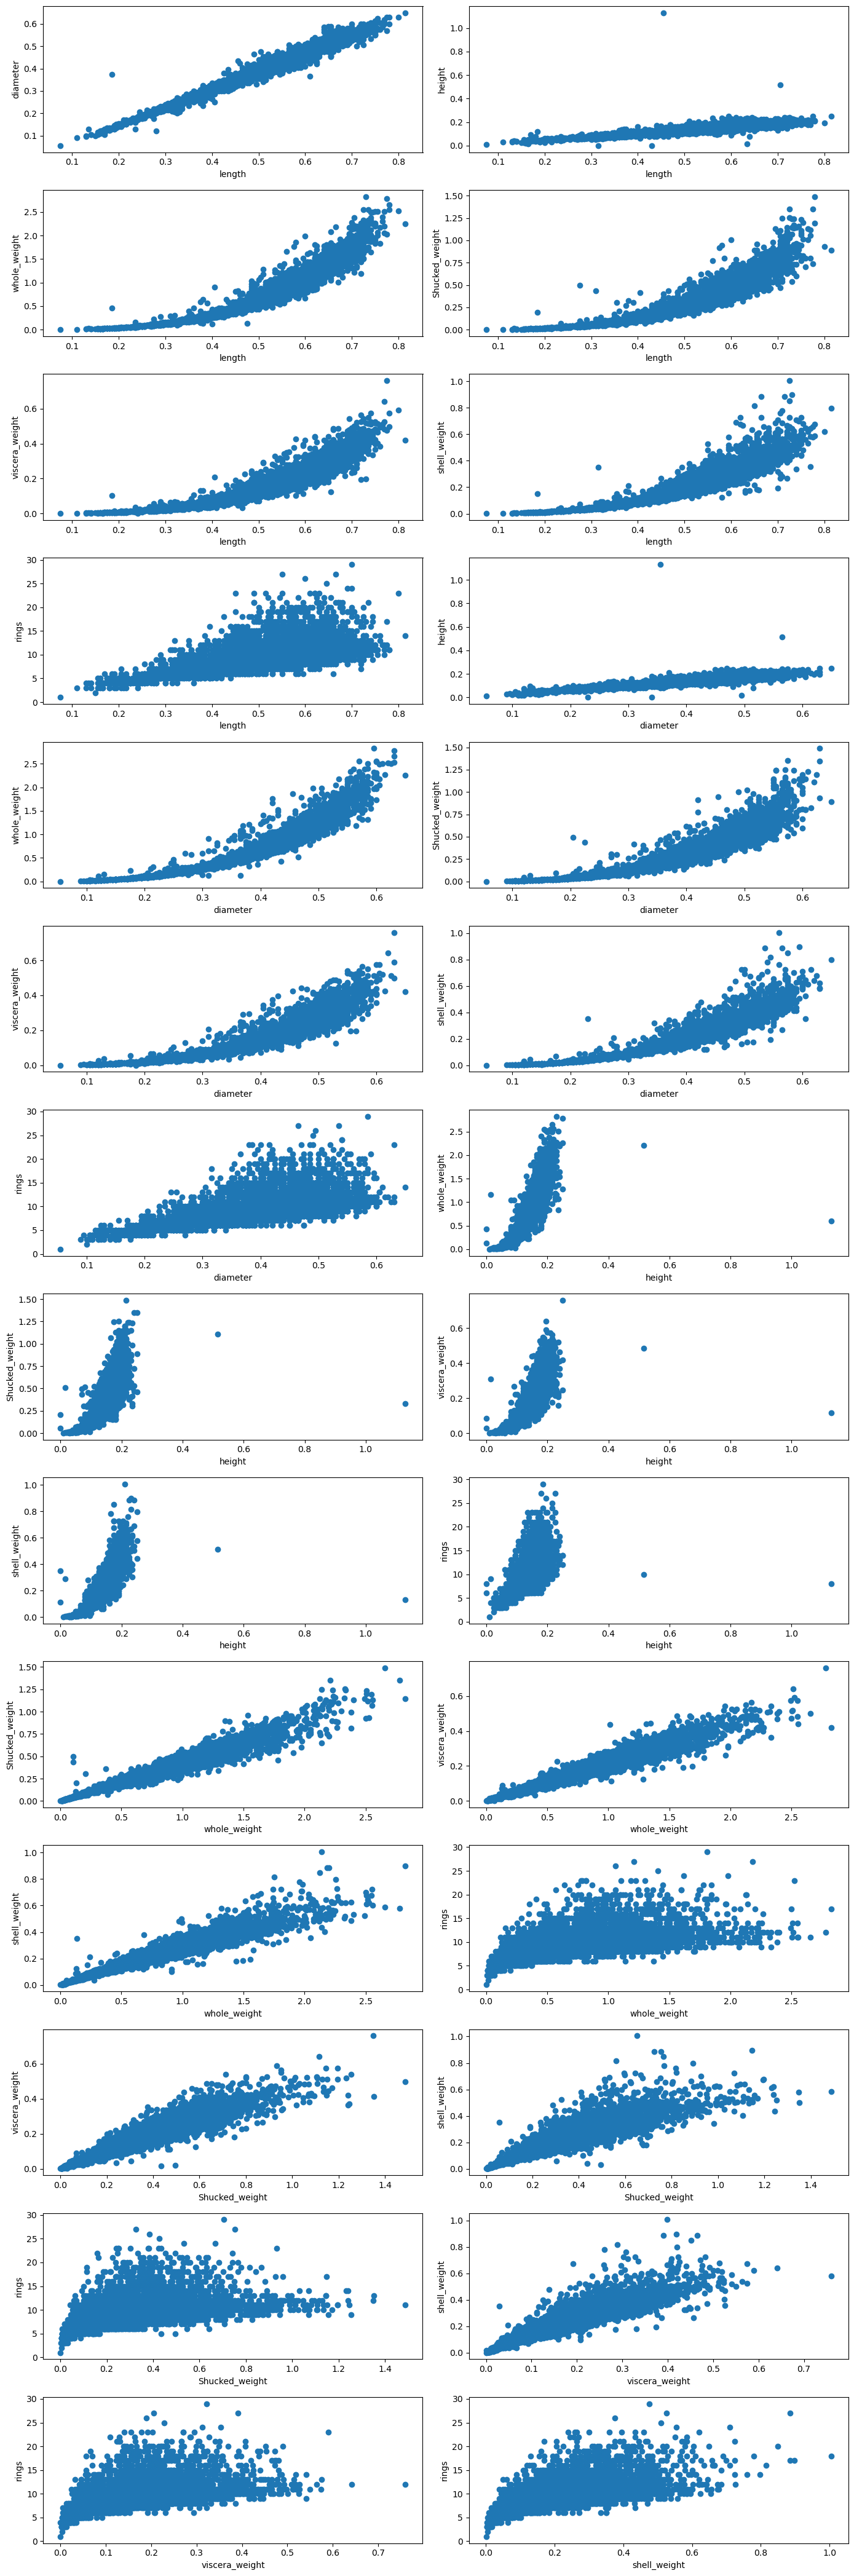

In [13]:
# Fifth part - Scatter plots
columns_to_count = ['length', 'diameter', 'height', 'whole_weight', 'Shucked_weight', 'viscera_weight', 'shell_weight', 'rings']
fig, axs = plt.subplots(14, 2, tight_layout=True, figsize=(14, 42))

index_x, index_y = 0, 0
visited = set()
for i in columns_to_count:
    for j in columns_to_count:
        if i == j:
            #print('te same')
            continue
        if (i, j) in visited or (j, i) in visited:
            #print('odwiedzone')
            continue
        
        values_x = data[i].values
        values_y = data[j].values
        ax = axs[index_x, index_y]
        ax.scatter(values_x, values_y)
        ax.set_xlabel(i)
        ax.set_ylabel(j)
        
        index_y += 1
        if index_y >= axs.shape[1]:
            index_y = 0
            index_x += 1    
            if index_x >= axs.shape[0]:
                break
        visited.add((i, j))
    if index_x >= axs.shape[0]:
                break   
plt.show()